In [1]:
# # install packages if not already installed on your machine
# install.packages("car")
# install.packages("plyr")
# install.packages("olsrr")
# install.packages("leaps")
# install.packages("GGally")
# install.packages("reshape")
# install.packages("janitor")
# install.packages("ggplot2")
# install.packages("tidyverse")
# install.packages("gridExtra")
# install.packages("tidymodels")


# Load required packages
library("car")
library("plyr")
library("olsrr")
library("leaps")
library("GGally")
library("reshape")
library("janitor")
library("ggplot2")
library("tidyverse")
library("gridExtra")
library("tidymodels")

Loading required package: carData


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape’


The following objects are masked from ‘package:plyr’:

    rename, round_any



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ tidyr::expand()    masks reshape::expand()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dply

# <center> Change To Some Report Title </center>

**Authors** Group 1, Proposal (Fiona Wang, Jack Fan, William Surya, Ria Ji)

**Abstract**   

## 1. Introduction

### 1.1 Background

Life expectancy is the estimate of the average number of additional years a person is expected to live. A growing body of research suggests that a person's life expectancy may be affected by a number of essential external factors, including but not limited to alcohol consumption level(the rate of people in a country drinking alcohol or not), regional differences, developing or developed country, BMI(body mass index), population, schooling(the education level of the population).   

Because where people live and work, what kind of lifestyle they are having, big or small the population is(resources allocated per capita), and their educational level, all affect their health, further speaking, they will affect their life expectancy over time.   

Insurance companies typically charge premiums for customers who are likely to pass away shortly after purchasing their policy. This is because they are undertaking a greater risk of paying the entire policy before the customer has invested more than the policy's worth. Therefore, life insurance companies use one's life expectancy to set the pricing of life insurance policies (Social Security, 2019). If there is a huge gap between your age and your life expectancy, there is a lower risk for the insurance company and the policy will be set at a cheaper price.

### 1.2 Question

As such, the motivation behind this group project is to determine the factors that best predicts one's life expectancy. Formally, we are addressing the question: "What are the variables that best predict one's life expectancy?" 

### 1.3 Dataset


To answer this question, we will be using the Life Expectancy Dataset from Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). The dataset consists of 2938 rows of Life Expectancy data collected from the World Health Organization (WHO) from 2000 to 2015 across 193 countries. Each row has 20 explanatory variable which can be grouped into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors(Kumar., 2017).

## 2. Methods and Results

### 2.1 Data Wrangling

We'll start by importing the dataset, loading it into a dataframe and inspecting the results. The original dataset can be found [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

In [2]:
le = read_csv("https://shorturl.at/FV478")

Rows: 2938 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# In order to display all column names, we need to change the max # of cols displayed
options(repr.matrix.max.cols=22, repr.matrix.max.rows=37)

In [4]:
# preview the first and last 3 rows of our data
head(le, n = 3)
tail(le, n = 3)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.27962,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.52358,62,492,18.6,86,58,8.18,62,0.1,612.6965,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.21924,64,430,18.1,89,62,8.13,64,0.1,631.7450,31731688,17.7,17.7,0.470,9.9


Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


As described in [[3.4 Tidy data, 1]](https://datasciencebook.ca/wrangling.html#tidy-data), a cleaned dataset should have the following attributes:   
> 1. each row is a single observation,   
> 2. each column is a single variable, and   
> 3. each value is a single cell (i.e., its entry in the data frame is not shared with another value).   

Our data clearly comes in with a tidy format.

Three steps can be done to improve our data, listed as following: 
- For readibility and naming convention, we will convert variable names into lowercase, and we will replace space in variable names with underscores for the validity of syntax. We can do these with the help of the janitor library.
- Moreover, we will remove `N/A` values if there exists any. 
- Also, we will convert "country" and "status" variables into `factor` type as they are expected to be. 

In [5]:
le = clean_names(le)

In [6]:
le = le %>% 
    mutate(country = as_factor(country)) %>% 
    mutate(status = as_factor(status))

In [7]:
# remove all NAs

total_rows <- le %>% nrow()

print(sprintf("there are %d rows in the data frame",total_rows))

le <- na.omit(le)

print(sprintf("there are %d rows in the data frame", nrow(le)))

[1] "there are 2938 rows in the data frame"
[1] "there are 1649 rows in the data frame"


In [8]:
le = le %>%     
    mutate(country = as_factor(country)) %>%
    mutate(status = as_factor(status))

In [9]:
# review our data
tail(le, n = 3)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zimbabwe,2002,Developing,44.8,73,25,4.43,0,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525,1.2,1.3,0.427,10.0
Zimbabwe,2001,Developing,45.3,686,25,1.72,0,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165,1.6,1.7,0.427,9.8
Zimbabwe,2000,Developing,46.0,665,24,1.68,0,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251,11.0,11.2,0.434,9.8


### 2.2 Exploratory Data Analysis: Correlations

Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”
Warning message in type.convert.default(X[[i]], ...):
“'as.is' should be specified by the caller; using TRUE”


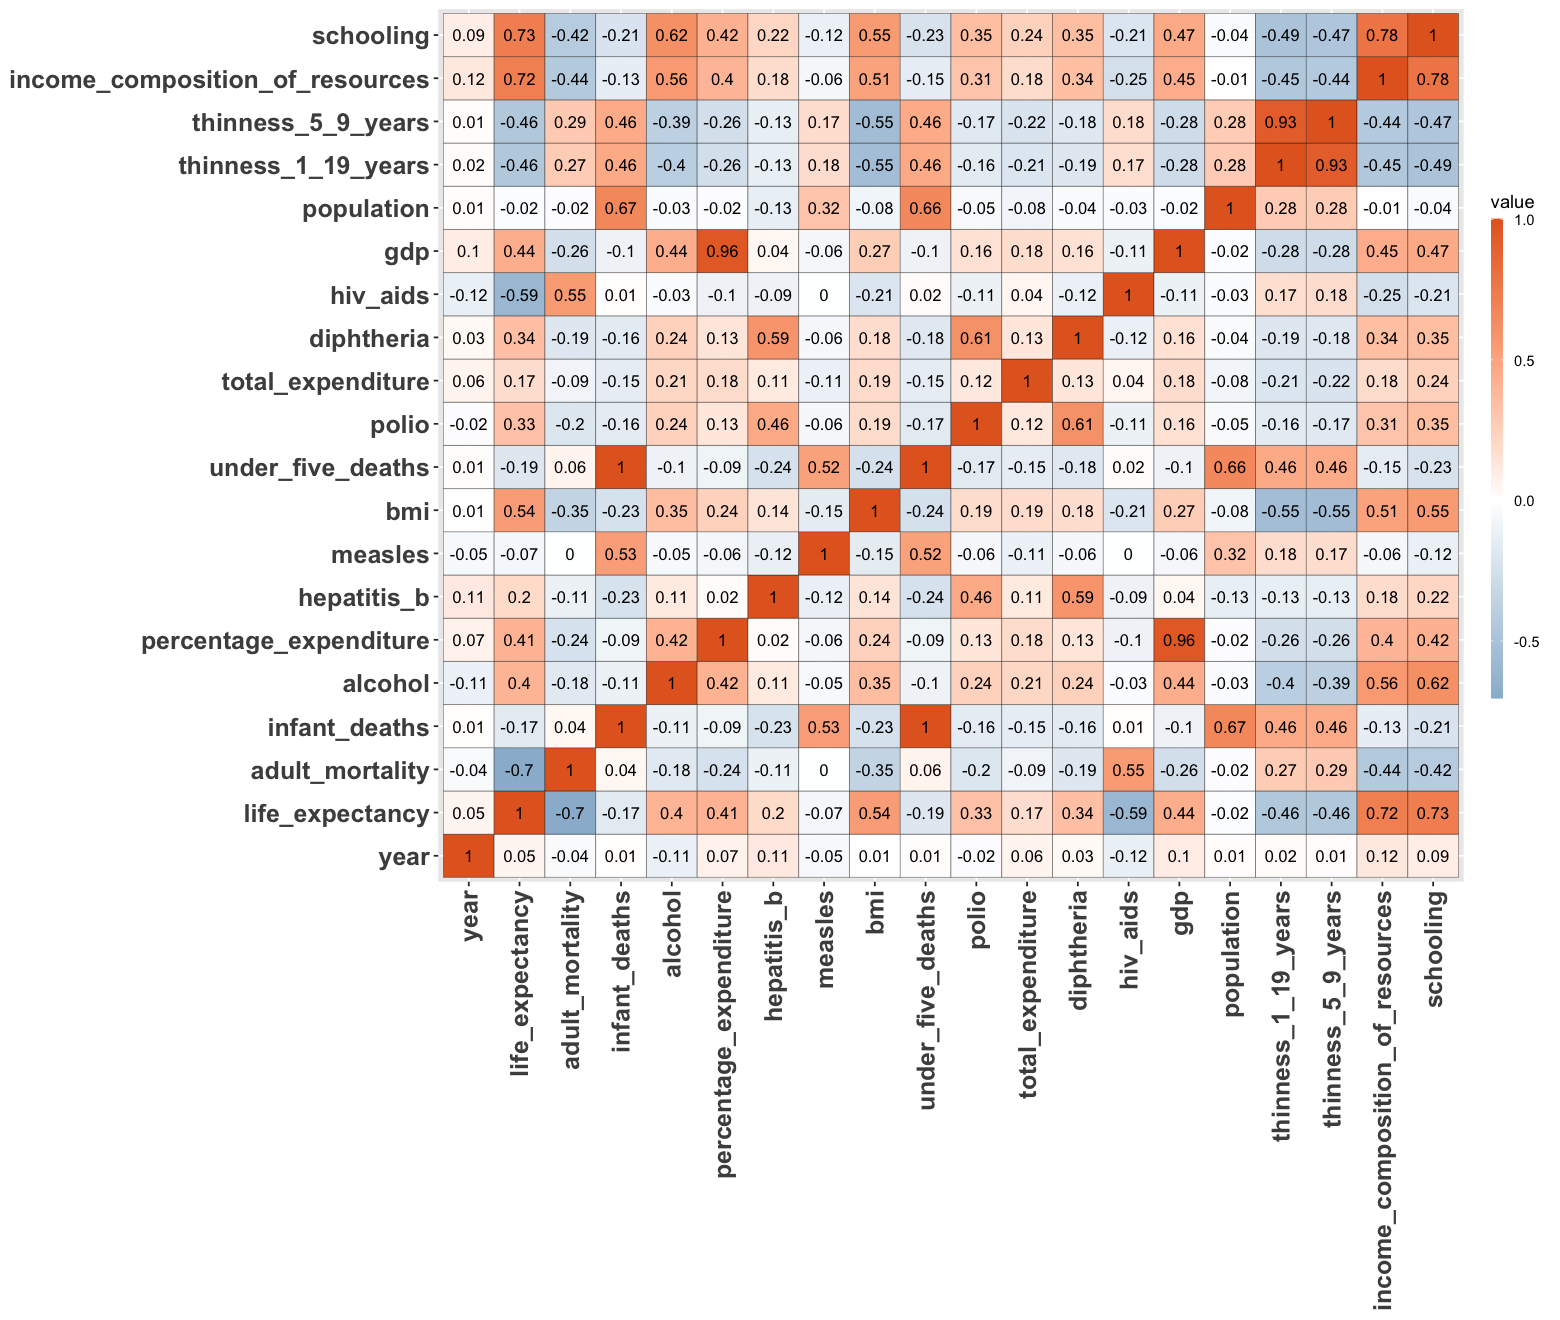

In [10]:
# correlation between numeric variables
cor_matrix <- cor(subset(le, select = -c(country, status) ))
melted <- melt(cor_matrix)

# Make plots larger 
options(repr.plot.width=13, repr.plot.height=11)

ggplot(melted) +
    geom_tile(aes(X1, X2, fill=value), colour = "black") + 
    geom_text(aes(X1, X2, label = round(value,2)), color = "black", size = 3.5) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
          axis.text=element_text(size=15, face="bold"), 
          axis.title=element_blank()) +
    scale_fill_gradient2(low = "#6D9EC1", high = "#E46726")+
    guides(fill = guide_colourbar(barwidth = 0.5, barheight = 20))

We noticed some of the variables have high correlation with our response variable, so we decide to explore each of their relationship with life expectancy individually. We plotted linear regression plot for the top 7 variables, which are gdp, adult_mortality, hiv_aids, income_composition_of_resources, school, percentage_expenditure, and bmi.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



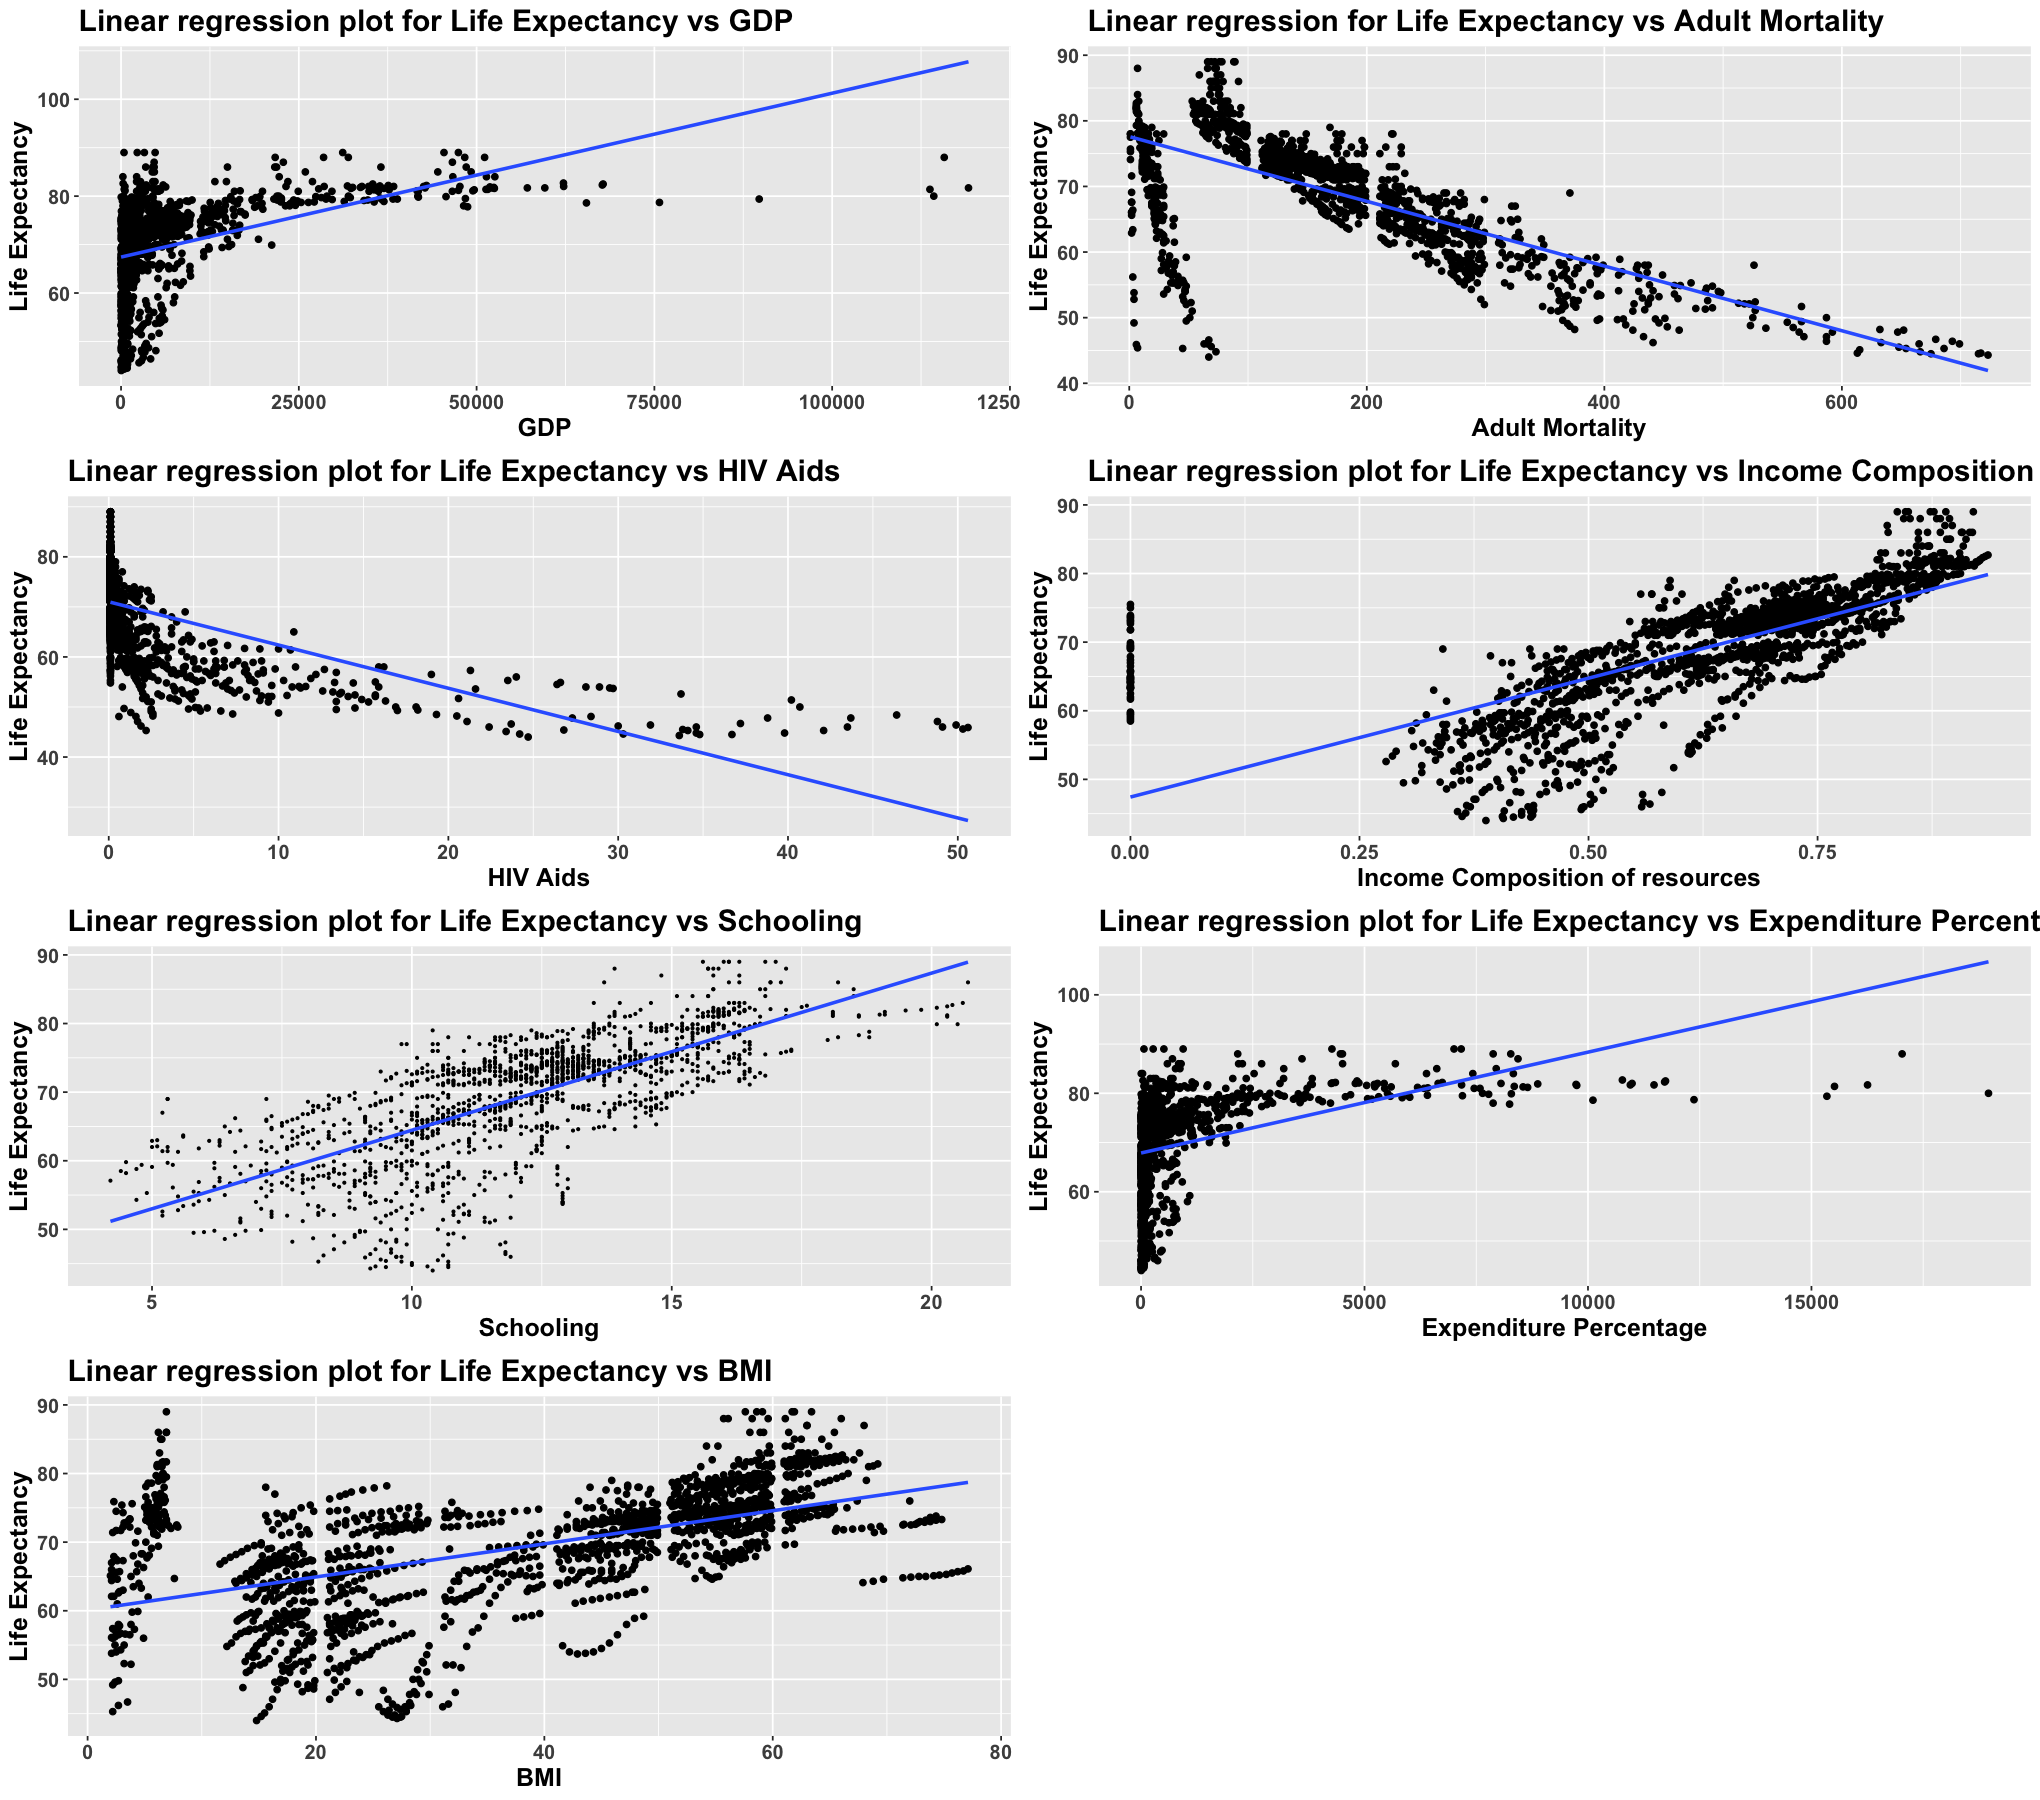

In [11]:
options(repr.plot.width=17, repr.plot.height=15, warnings = FALSE)
plot1 <- le %>% ggplot(mapping = aes(gdp, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs GDP", x="GDP", y="Life Expectancy")

plot2 <- le %>% ggplot(mapping = aes(adult_mortality, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression for Life Expectancy vs Adult Mortality", x="Adult Mortality", y="Life Expectancy")

plot3 <- le %>% ggplot(mapping=aes(hiv_aids,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs HIV Aids", x="HIV Aids", y="Life Expectancy")

plot4 <- le %>% ggplot(mapping=aes(income_composition_of_resources,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs Income Composition of Resources", 
         x="Income Composition of resources", y="Life Expectancy")

plot5 <- le %>% ggplot(mapping=aes(schooling,life_expectancy)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs Schooling", x="Schooling", y="Life Expectancy")

plot6 <- le %>% ggplot(mapping = aes(percentage_expenditure, life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs Expenditure Percentage", x="Expenditure Percentage", y="Life Expectancy")

plot7 <- le %>% ggplot(mapping=aes(bmi,life_expectancy)) + 
    geom_point() + 
    geom_smooth(method="lm", se = FALSE) + 
    theme(text=element_text(size=15, face="bold"))+
    labs(title = "Linear regression plot for Life Expectancy vs BMI", x="BMI", y="Life Expectancy")

grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, nrow = 4)

From the graph above, gdp, hiv_aids, and percentage_expenditure seems to be mostly clustered along the lower end of the x-axis, with few points on the larger scale. For other four variables, points are mostly scattered apart along the regression line. We noticed that adult mortality have a strong linear association with life expectancy, but we are excluding this variable in later analysis since it is very similar to our response variable, both are measure of people's death, a variation of life expectancy, its strong correlation might effect the exploration on other possible predictor variables. For the same reason, we are also excluding infant_deaths and under_five_deaths, it is just a quantitative measurement of people with lower life expectancy. The country variable is not included as well since we are not considering life expectancy difference across countries and it cannot classify as a category variable.  

In [12]:
le = subset(select(le, -country))

### 2.3 Exploratory Data Analysis: Visualizations

First, we will start with exploring the distribution of life expectancy using a histogram. We can see from the graph below, the distribution is unimodel but not normal and it is slightly left-skewed. The mean year of life expectancy is slgihtly below 70, but there are above 200 people has life expectancy of 73 to 74 years. The graph below gives us a general view of the distribution of our response variable. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



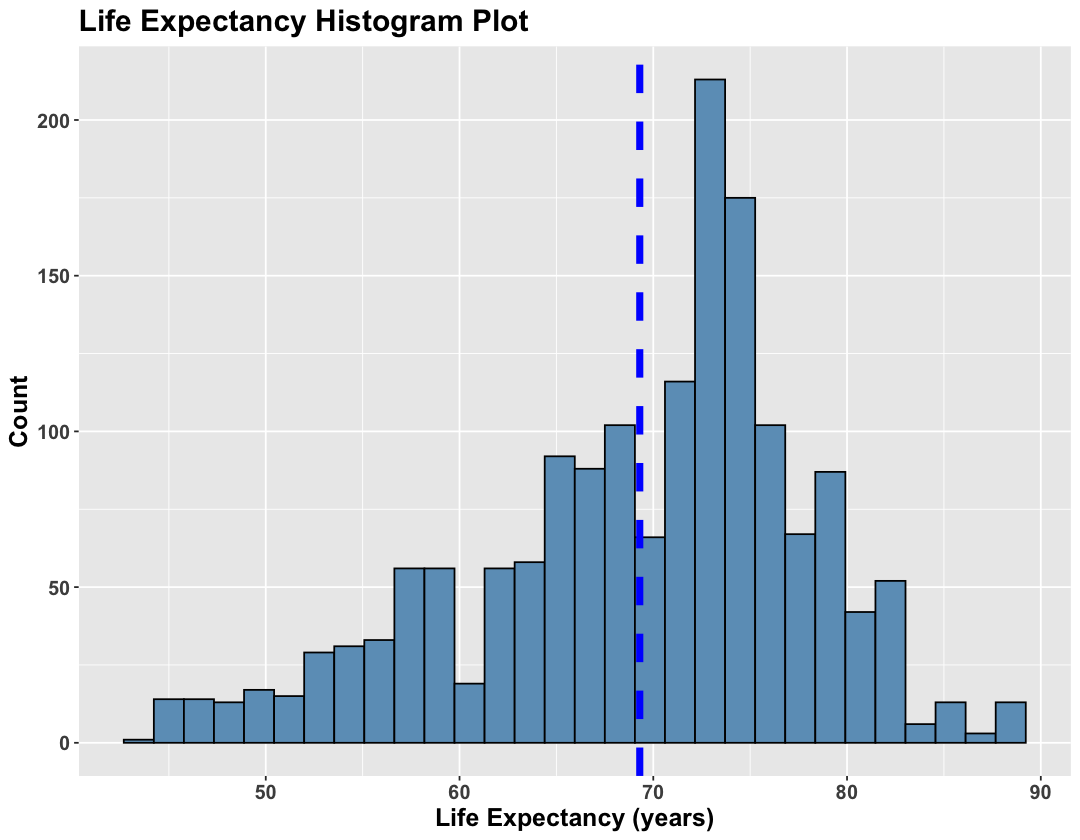

In [13]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(aes(x = life_expectancy)) + 
    geom_histogram(alpha = 2,color = "black", fill = "#6d9ec1") +
    geom_vline(aes(xintercept=mean(life_expectancy)), color="blue",
             linetype="dashed", lwd = 2)+
    labs(title="Life Expectancy Histogram Plot",x="Life Expectancy (years)", y = "Count")+
    theme(text=element_text(size=15, face = "bold"))

Also using a Q-Q plot to check if this data set is a normal distribution, which is one of the assumptions for doing linear regression. The graph below shows that our data set is not very normally distributed, it is a bit tailed and left skew. 

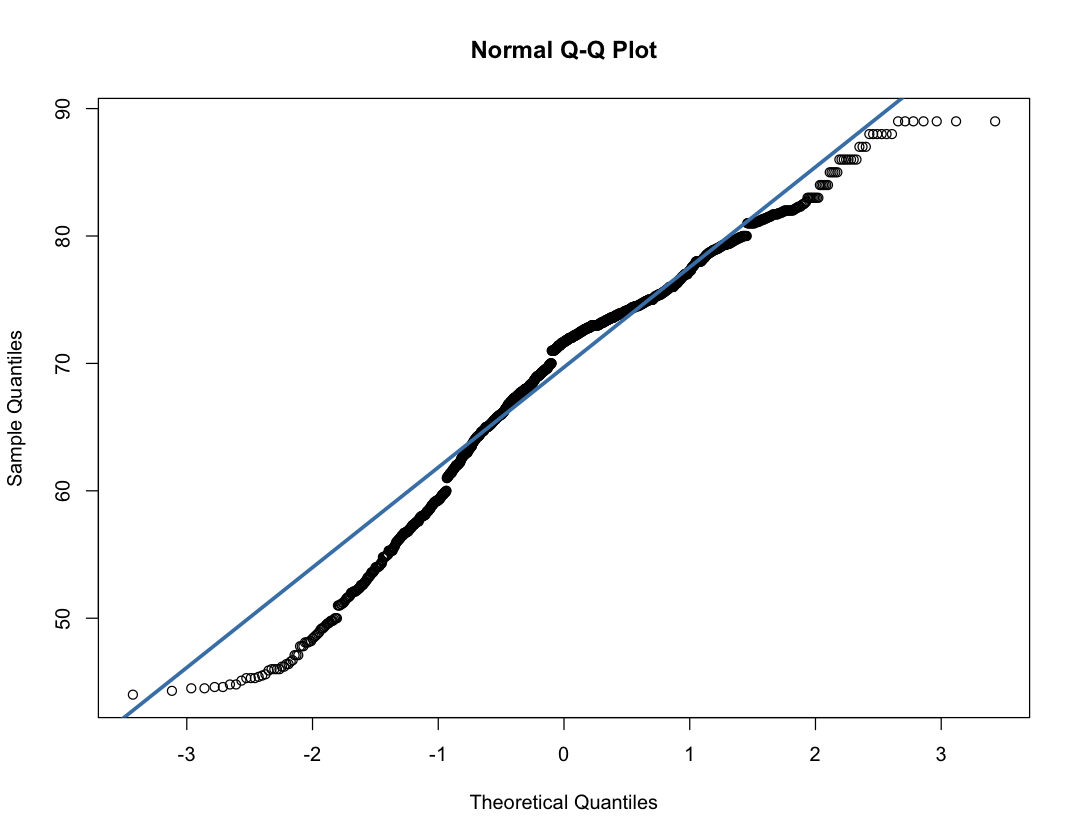

In [14]:
qqnorm(le$life_expectancy)
qqline(le$life_expectancy, col = "steelblue", lwd = 3)

Then we are exploring the relationship between Life Expectancy over the years from 2000 to 2015 according to country's developing status. From the graph below, the two lines of mean for both status showing an increasing trend, which means people have higher life expectancy on average in 2015 than 2000. We can also see a clear difference between developing countries and developed countires points, most of the data points are above 70 for developed country, while developing coutries' data points are mostly below 80. So considering this difference, we might need to include interaction terms in later analysis.

`geom_smooth()` using formula 'y ~ x'



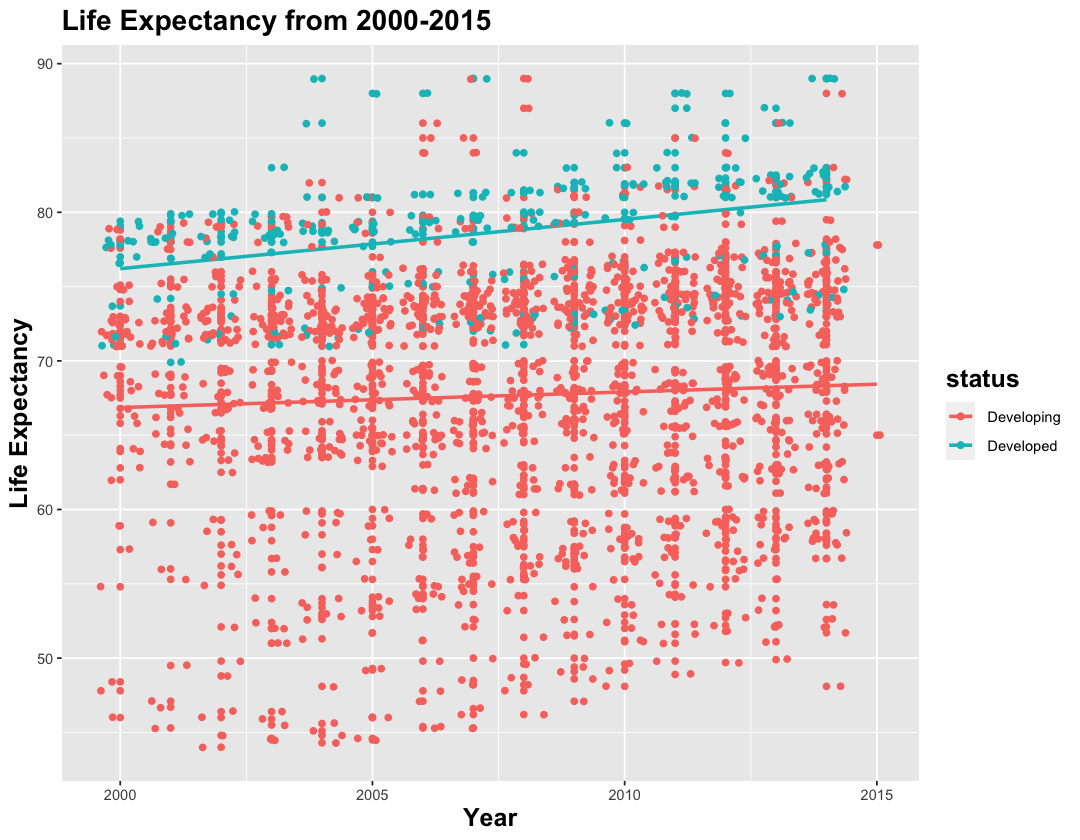

In [15]:
options(repr.plot.width=9, repr.plot.height=7)
le %>% ggplot(mapping=aes(year,life_expectancy, color=status)) + 
    geom_point() + 
    geom_smooth(method="lm",se=FALSE) + 
    theme(plot.title=element_text(size=17, face = "bold"), 
        axis.title=element_text(size=15, face="bold"), 
        legend.title = element_text(size = 15, face = "bold")) + 
    labs(title="Life Expectancy from 2000-2015", x = "Year", y = "Life Expectancy") + 
    geom_jitter()

### 2.4 Train-Test Split

To avoid potential information leakage from the test set which will result in adding bias to our model, we will first split the data into a train set and test set with a ratio of 75 / 25, before performing variable selection using the train set. Also, we want to have approximately the same proportions of data for the factor variable `status` to ensure the two subgroups `Developing` and `Developed` are properly represented in both train and test set. 

In [16]:
set.seed(1)
le_split = initial_split(le, prop = 0.75, strata = status)
le_train = training(le_split)
le_test  = testing(le_split)

### 2.5 Variable Selection 

First, we extract the column names for the full set of predictor variables, excluding `life_expectancy`, which is our response variable, for the use of the selection process in the next step. 

In [17]:
names <- colnames(select(le, -life_expectancy))
names

[1] "year"                            "status"                         
 [3] "adult_mortality"                 "infant_deaths"                  
 [5] "alcohol"                         "percentage_expenditure"         
 [7] "hepatitis_b"                     "measles"                        
 [9] "bmi"                             "under_five_deaths"              
[11] "polio"                           "total_expenditure"              
[13] "diphtheria"                      "hiv_aids"                       
[15] "gdp"                             "population"                     
[17] "thinness_1_19_years"             "thinness_5_9_years"             
[19] "income_composition_of_resources" "schooling"

In this step, we will perform a preliminary variable selection using the forward selection method. The forward selection process begins with a null model. Then iteratively, at each step, the model includes the variable that improves the model the best as the best subset model. The RSS (Residual Sum of Squares) is used as the criterion during the process. The model with the lowest RSS value is qualified as the best. 

In [18]:
le_forward_sel <- regsubsets(
  x =  life_expectancy ~ ., nvmax = length(names),
  data = le_train,
  method = "forward"
)

le_forward_summary <- summary(le_forward_sel)
le_forward_summary

Subset selection object
Call: regsubsets.formula(x = life_expectancy ~ ., nvmax = length(names), 
    data = le_train, method = "forward")
20 Variables  (and intercept)
                                Forced in Forced out
year                                FALSE      FALSE
statusDeveloped                     FALSE      FALSE
adult_mortality                     FALSE      FALSE
infant_deaths                       FALSE      FALSE
alcohol                             FALSE      FALSE
percentage_expenditure              FALSE      FALSE
hepatitis_b                         FALSE      FALSE
measles                             FALSE      FALSE
bmi                                 FALSE      FALSE
under_five_deaths                   FALSE      FALSE
polio                               FALSE      FALSE
total_expenditure                   FALSE      FALSE
diphtheria                          FALSE      FALSE
hiv_aids                            FALSE      FALSE
gdp                                 

In [19]:
le_forward_summary_df <- tibble(
    n_input_variables = 1:20,
    RSQ = le_forward_summary$rsq,
    RSS = le_forward_summary$rss,
    ADJ.R2 = le_forward_summary$adjr2,
    Cp = le_forward_summary$cp,
    BIC = le_forward_summary$bic)
le_forward_summary_df

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5296699,44713.89,0.5292888,2337.03068,-918.1009
2,0.7262821,26022.13,0.7258381,847.06809,-1580.0735
3,0.7802627,20890.24,0.7797276,439.44444,-1844.4600
4,0.8032333,18706.45,0.8025939,267.13531,-1973.8121
5,0.8099417,18068.69,0.8091691,218.22978,-2009.5665
6,0.8165916,17436.48,0.8156962,169.76772,-2046.4679
7,0.8211251,17005.49,0.8201054,137.36597,-2070.2836
8,0.8247368,16662.13,0.8235941,111.95913,-2088.3757
9,0.8277375,16376.85,0.8264730,91.18836,-2102.6014


According to the above output, the model with 15 variables has the highest adjusted $R^2$ value (0.8426326). This indicates that the further added variables do not improve the model in the statistical sense, that is, the improvement to the model from added variables is not significantly different from what would be obtained by chance. Also, the Mallow's $C_p$ for the model with 15 variables is 13.81861, which suggests that the model performs decently well and unbiasedly. In addition, this model has the lowest BIC value as well (-2186.7663). 

Thus, we will first construct a full model for calculating mallow's $C_p$ (referred as `md0`), then we will construct a model from the 15 variables as chosen above using train set. We will refer this model as `md1`. 

In [20]:
# full model 
md0 = lm(life_expectancy ~ ., data = le_train)

In [21]:
# model with 15 variables 
md1 = lm(life_expectancy ~ year + status + adult_mortality + infant_deaths + alcohol + 
                          percentage_expenditure + bmi + under_five_deaths + 
                          polio + total_expenditure + diphtheria + hiv_aids + thinness_5_9_years + 
                          income_composition_of_resources + schooling, data = le_train)
summary(md1)


Call:
lm(formula = life_expectancy ~ year + status + adult_mortality + 
    infant_deaths + alcohol + percentage_expenditure + bmi + 
    under_five_deaths + polio + total_expenditure + diphtheria + 
    hiv_aids + thinness_5_9_years + income_composition_of_resources + 
    schooling, data = le_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.3498  -2.1817  -0.0131   2.1106  12.4852 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.493e+02  5.178e+01   6.747 2.33e-11 ***
year                            -1.478e-01  2.586e-02  -5.714 1.39e-08 ***
statusDeveloped                  1.182e+00  3.784e-01   3.124  0.00182 ** 
adult_mortality                 -1.499e-02  1.063e-03 -14.099  < 2e-16 ***
infant_deaths                    8.706e-02  1.092e-02   7.973 3.53e-15 ***
alcohol                         -1.542e-01  3.779e-02  -4.081 4.78e-05 ***
percentage_expenditure           5.240e-04  7.157e-0

Due to the machanism the forward selection adopted, once a variable is selected during the process, it will always be carried to the next step. The previously significant variable may become non-significant due to correlations with newly added variables. It is important to remove variables one at a time to minimize the effect of underlyng correlations. Thus, we try to first construct a model without the least significant variables `polio` as shown in the above model output. Also, we will calculate Mallow's $C_p$ for both the `md1` and the model with variable `polio` removed, which we will refer to as `md2`. 

In [22]:
md2 = lm(life_expectancy ~ year + status + adult_mortality + infant_deaths + alcohol + 
                          percentage_expenditure + bmi + under_five_deaths + 
                          total_expenditure + diphtheria + hiv_aids + thinness_5_9_years + 
                          income_composition_of_resources + schooling, data = le_train)
summary(md2)


Call:
lm(formula = life_expectancy ~ year + status + adult_mortality + 
    infant_deaths + alcohol + percentage_expenditure + bmi + 
    under_five_deaths + total_expenditure + diphtheria + hiv_aids + 
    thinness_5_9_years + income_composition_of_resources + schooling, 
    data = le_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.405  -2.184  -0.001   2.088  12.417 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.530e+02  5.174e+01   6.823 1.40e-11 ***
year                            -1.495e-01  2.585e-02  -5.784 9.24e-09 ***
statusDeveloped                  1.182e+00  3.786e-01   3.122 0.001836 ** 
adult_mortality                 -1.505e-02  1.062e-03 -14.172  < 2e-16 ***
infant_deaths                    8.777e-02  1.091e-02   8.043 2.05e-15 ***
alcohol                         -1.529e-01  3.780e-02  -4.045 5.55e-05 ***
percentage_expenditure           5.220e-04  7.159e-05   7.292 5.49e-13

In [23]:
ols_mallows_cp(md1, md0)

[1] 13.22448

In [24]:
ols_mallows_cp(md2, md0)

[1] 13.32262

As seen above, the adjusted $R^2$ remains the same at the 4 digit level, indicating the model performance does not significantly differ from `md1`. The Mallow's $C_p$ decreased for `md2`, indicating a slightly higher precision and less bias.  Also, non-significant variable `diphtheria` in `md1` becomes significant in this model. Some potential confounding factors can be a possible explanation in this case.   

Further, we would like to explore the multicolinearity (a.k.a the correlations between the covariates) by computing the Variance Inflation Factor (VIF). 

In [25]:
md2.vif = data.frame(vif = vif(md2))
md2.vif

,vif
,<dbl>
year,1.113290
status,1.769786
adult_mortality,1.697765
infant_deaths,181.539847
alcohol,2.336947
percentage_expenditure,1.398532
bmi,1.773277
under_five_deaths,181.763941
total_expenditure,1.116581


The VIF result of covariates `infant_deaths` and `under_five_deaths` are significantly higher (> 180) than what is empirically taken as a threashold to determine a high correlation (usually greater than 10 indicates high correlation). Thus, we will try to remove `infant_deaths` first and do a further examination based on the results. We refer the model with `infant_deaths` removed as `md3`. 

In [26]:
md3 = lm(life_expectancy ~ year + status + adult_mortality + alcohol + 
                          percentage_expenditure + bmi + under_five_deaths + 
                          total_expenditure + diphtheria + hiv_aids + thinness_5_9_years + 
                          income_composition_of_resources + schooling, data = le_train)
summary(md3)


Call:
lm(formula = life_expectancy ~ year + status + adult_mortality + 
    alcohol + percentage_expenditure + bmi + under_five_deaths + 
    total_expenditure + diphtheria + hiv_aids + thinness_5_9_years + 
    income_composition_of_resources + schooling, data = le_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.5475  -2.2136   0.0629   2.2579  12.1502 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.945e+02  5.280e+01   7.472 1.50e-13 ***
year                            -1.708e-01  2.637e-02  -6.477 1.35e-10 ***
statusDeveloped                  1.161e+00  3.883e-01   2.991  0.00284 ** 
adult_mortality                 -1.601e-02  1.083e-03 -14.787  < 2e-16 ***
alcohol                         -2.059e-01  3.818e-02  -5.394 8.27e-08 ***
percentage_expenditure           5.206e-04  7.343e-05   7.089 2.27e-12 ***
bmi                              3.945e-02  7.036e-03   5.606 2.56e-08 ***
under_

In [27]:
md3.vif = data.frame(vif = vif(md3))
md3.vif

,vif
,<dbl>
year,1.101603
status,1.769704
adult_mortality,1.676481
alcohol,2.265869
percentage_expenditure,1.398524
bmi,1.772377
under_five_deaths,1.378440
total_expenditure,1.116433
diphtheria,1.204503


As we can see, the adjusted $R^2$ decreased from 0.8426 to 0.8357 after removing one of the correlated covariates `infant_deaths`. However, the VIF results are all under 5, which indicates a relatively low correlation. The trade-off is worthy to make.   

### 2.6 Detect Heteroscedasticity

We are concerned about potential heteroscedasticity, which might be a serious issue when making predictioins. Non-constant variance makes the predicted standard deviation of forcast errors unreliable. Thus, we will explore this problem here. 

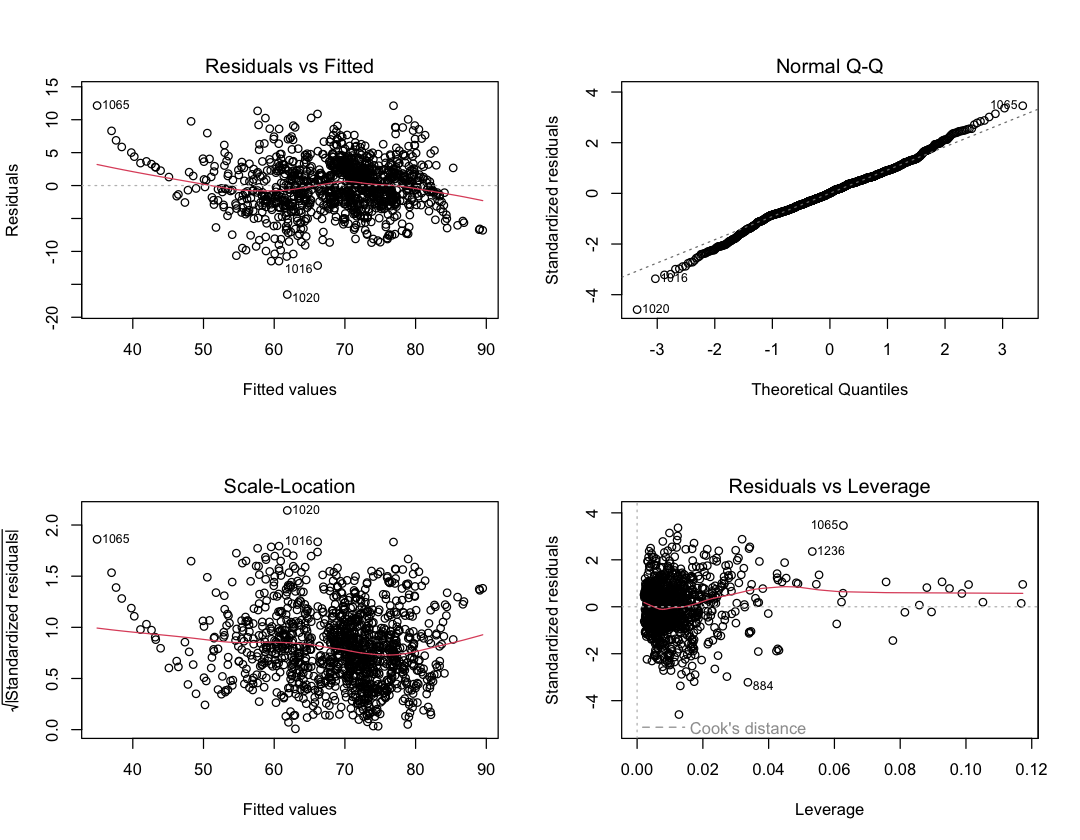

In [28]:
par(mfrow = c(2, 2))
plot(md3)

<span style="color:red">TODO: some interpretation here.  

### 2.7 Model Evaluation

Therefore, `md3` will be our final model. Now, we will perform prediction on the test and calculate the coefficients of determination ($R^2$) to evaluate the model accuracy. 

In [29]:
le_test["pred"] <- predict(md3, le_test)

In [30]:
# compute coefficients of determination 
r_squared = cor(le_test["life_expectancy"], le_test["pred"]) ^ 2
r_squared[1, 1]

[1] 0.8314834

We obtained a $R^2$ score of 0.831483411372635. This means approximately 83% of variability observed in `life_expectancy` in the test set can be explained by our model. 

## 3. Methods

- What methods do you plan on using?

We will perform EDA to detect heteroscedasticity and remove multicollinearity. Afterwards, we will split the model into the training set and the testing set with a 75-25 split.

Using the training set, we will perform a forward generative modelling to determine which input variables explain the variance of the error terms the best. Using the same training set, we will create a linear model using the selected input variables in an additive model.

Finally, we will evaluate the performance of the linear model using the testing set.
Stretch Goal: We will also evaluate a linear model using an interactive model, and compare which one is better using an ANOVA test.

- What do you expect to achieve?

Through our analysis, we expect to determine the input variables that predict one’s life expectancy the best, and the extent that the variable affects the predicted life expectancy.

- What impact could your results have?

Our results can be used by life insurance companies to determine the price of insurance plans depending on one’s expected life expectancy.



### 3.1 Strengths

### 3.2 Limitations

### 3.3 Analysis

## 4. Reflection

# <center>References</center>

1. Data Science: A First Introduction. Last updated September 24, 2022. [Source](https://datasciencebook.ca/).